In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [9]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/N_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Baffin = pd.read_excel(filepath, sheet_name='Baffin-Extent-km^2')

In [10]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/NH/')
import Function as fp

In [11]:
fp.month_mapping(Baffin)
fp.date_time(Baffin)

,Extent,Date
0,1090625.815,1979-01-01
1,1157634.866,1979-02-01
2,1299583.477,1979-03-01
3,1137194.680,1979-04-01
4,983083.453,1979-05-01
...,...,...
533,781460.891,2023-06-01
534,331845.048,2023-07-01
535,99334.625,2023-08-01
536,49359.723,2023-09-01


In [12]:
scaler = MinMaxScaler()
Baffin['Extent'] = scaler.fit_transform(Baffin['Extent'].values.reshape(-1, 1))

In [13]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 8
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]  # Adjusted for lead time
        y.append(label)
    return np.array(X), np.array(y)

In [14]:
extent = Baffin['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((519, 12, 1), (519,))

In [15]:
X_train, y_train = X[:419], y[:419]
X_val, y_val = X[419:471], y[419:471]
X_test, y_test = X[471:], y[471:]

In [16]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [17]:
cp = ModelCheckpoint('Baffin_model_LT8/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [18]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
47/53 [=========================>....] - ETA: 0s - loss: 0.1991 - root_mean_squared_error: 0.4462

INFO:tensorflow:Assets written to: Baffin_model_LT8\assets


INFO:tensorflow:Assets written to: Baffin_model_LT8\assets


53/53 [==============================] - 8s 105ms/step - loss: 0.1968 - root_mean_squared_error: 0.4436 - val_loss: 0.1622 - val_root_mean_squared_error: 0.4027
Epoch 2/50
48/53 [==========================>...] - ETA: 0s - loss: 0.1548 - root_mean_squared_error: 0.3934

INFO:tensorflow:Assets written to: Baffin_model_LT8\assets


INFO:tensorflow:Assets written to: Baffin_model_LT8\assets


53/53 [==============================] - 5s 90ms/step - loss: 0.1529 - root_mean_squared_error: 0.3910 - val_loss: 0.1467 - val_root_mean_squared_error: 0.3830
Epoch 3/50
49/53 [==========================>...] - ETA: 0s - loss: 0.1212 - root_mean_squared_error: 0.3481

INFO:tensorflow:Assets written to: Baffin_model_LT8\assets


INFO:tensorflow:Assets written to: Baffin_model_LT8\assets


53/53 [==============================] - 5s 96ms/step - loss: 0.1216 - root_mean_squared_error: 0.3486 - val_loss: 0.1277 - val_root_mean_squared_error: 0.3573
Epoch 4/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0936 - root_mean_squared_error: 0.3059

INFO:tensorflow:Assets written to: Baffin_model_LT8\assets


INFO:tensorflow:Assets written to: Baffin_model_LT8\assets


53/53 [==============================] - 5s 99ms/step - loss: 0.0951 - root_mean_squared_error: 0.3083 - val_loss: 0.1100 - val_root_mean_squared_error: 0.3317
Epoch 5/50
53/53 [==============================] - ETA: 0s - loss: 0.0777 - root_mean_squared_error: 0.2787

INFO:tensorflow:Assets written to: Baffin_model_LT8\assets


INFO:tensorflow:Assets written to: Baffin_model_LT8\assets


53/53 [==============================] - 5s 95ms/step - loss: 0.0777 - root_mean_squared_error: 0.2787 - val_loss: 0.0889 - val_root_mean_squared_error: 0.2981
Epoch 6/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0594 - root_mean_squared_error: 0.2438

INFO:tensorflow:Assets written to: Baffin_model_LT8\assets


INFO:tensorflow:Assets written to: Baffin_model_LT8\assets


53/53 [==============================] - 5s 100ms/step - loss: 0.0582 - root_mean_squared_error: 0.2412 - val_loss: 0.0754 - val_root_mean_squared_error: 0.2745
Epoch 7/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0472 - root_mean_squared_error: 0.2172

INFO:tensorflow:Assets written to: Baffin_model_LT8\assets


INFO:tensorflow:Assets written to: Baffin_model_LT8\assets


53/53 [==============================] - 5s 91ms/step - loss: 0.0444 - root_mean_squared_error: 0.2107 - val_loss: 0.0590 - val_root_mean_squared_error: 0.2430
Epoch 8/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0365 - root_mean_squared_error: 0.1911

INFO:tensorflow:Assets written to: Baffin_model_LT8\assets


INFO:tensorflow:Assets written to: Baffin_model_LT8\assets


53/53 [==============================] - 5s 95ms/step - loss: 0.0369 - root_mean_squared_error: 0.1921 - val_loss: 0.0503 - val_root_mean_squared_error: 0.2242
Epoch 9/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0302 - root_mean_squared_error: 0.1737

INFO:tensorflow:Assets written to: Baffin_model_LT8\assets


INFO:tensorflow:Assets written to: Baffin_model_LT8\assets


53/53 [==============================] - 5s 93ms/step - loss: 0.0279 - root_mean_squared_error: 0.1669 - val_loss: 0.0369 - val_root_mean_squared_error: 0.1921
Epoch 10/50
53/53 [==============================] - ETA: 0s - loss: 0.0235 - root_mean_squared_error: 0.1534

INFO:tensorflow:Assets written to: Baffin_model_LT8\assets


INFO:tensorflow:Assets written to: Baffin_model_LT8\assets


53/53 [==============================] - 5s 91ms/step - loss: 0.0235 - root_mean_squared_error: 0.1534 - val_loss: 0.0256 - val_root_mean_squared_error: 0.1601
Epoch 11/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0196 - root_mean_squared_error: 0.1400

INFO:tensorflow:Assets written to: Baffin_model_LT8\assets


INFO:tensorflow:Assets written to: Baffin_model_LT8\assets


53/53 [==============================] - 5s 91ms/step - loss: 0.0203 - root_mean_squared_error: 0.1425 - val_loss: 0.0162 - val_root_mean_squared_error: 0.1271
Epoch 12/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0146 - root_mean_squared_error: 0.1207

INFO:tensorflow:Assets written to: Baffin_model_LT8\assets


INFO:tensorflow:Assets written to: Baffin_model_LT8\assets


53/53 [==============================] - 6s 108ms/step - loss: 0.0165 - root_mean_squared_error: 0.1283 - val_loss: 0.0148 - val_root_mean_squared_error: 0.1216
Epoch 13/50
52/53 [============================>.] - ETA: 0s - loss: 0.0143 - root_mean_squared_error: 0.1194

INFO:tensorflow:Assets written to: Baffin_model_LT8\assets


INFO:tensorflow:Assets written to: Baffin_model_LT8\assets


53/53 [==============================] - 5s 97ms/step - loss: 0.0142 - root_mean_squared_error: 0.1193 - val_loss: 0.0082 - val_root_mean_squared_error: 0.0906
Epoch 14/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0155 - root_mean_squared_error: 0.1245

INFO:tensorflow:Assets written to: Baffin_model_LT8\assets


INFO:tensorflow:Assets written to: Baffin_model_LT8\assets


53/53 [==============================] - 5s 91ms/step - loss: 0.0155 - root_mean_squared_error: 0.1246 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0702
Epoch 15/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0153 - root_mean_squared_error: 0.1238 - val_loss: 0.0119 - val_root_mean_squared_error: 0.1092
Epoch 16/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0129 - root_mean_squared_error: 0.1136

INFO:tensorflow:Assets written to: Baffin_model_LT8\assets


INFO:tensorflow:Assets written to: Baffin_model_LT8\assets


53/53 [==============================] - 5s 96ms/step - loss: 0.0131 - root_mean_squared_error: 0.1142 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0652
Epoch 17/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0169 - root_mean_squared_error: 0.1300 - val_loss: 0.0109 - val_root_mean_squared_error: 0.1045
Epoch 18/50
52/53 [============================>.] - ETA: 0s - loss: 0.0161 - root_mean_squared_error: 0.1269

INFO:tensorflow:Assets written to: Baffin_model_LT8\assets


INFO:tensorflow:Assets written to: Baffin_model_LT8\assets


53/53 [==============================] - 5s 95ms/step - loss: 0.0160 - root_mean_squared_error: 0.1265 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0559
Epoch 19/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0152 - root_mean_squared_error: 0.1235

INFO:tensorflow:Assets written to: Baffin_model_LT8\assets


INFO:tensorflow:Assets written to: Baffin_model_LT8\assets


53/53 [==============================] - 5s 99ms/step - loss: 0.0149 - root_mean_squared_error: 0.1222 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0552
Epoch 20/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0145 - root_mean_squared_error: 0.1205 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0560
Epoch 21/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0131 - root_mean_squared_error: 0.1145 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0552
Epoch 22/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0130 - root_mean_squared_error: 0.1142 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0734
Epoch 23/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0150 - root_mean_squared_error: 0.1223 - val_loss: 0.0069 - val_root_mean_squared_error: 0.0828
Epoch 24/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0176 - root_mean_squared_error: 0.1328 - val_loss: 0.0053 - val_root_mean_squared

INFO:tensorflow:Assets written to: Baffin_model_LT8\assets


INFO:tensorflow:Assets written to: Baffin_model_LT8\assets


53/53 [==============================] - 4s 80ms/step - loss: 0.0153 - root_mean_squared_error: 0.1238 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0540
Epoch 26/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0132 - root_mean_squared_error: 0.1148 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0604
Epoch 27/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0155 - root_mean_squared_error: 0.1245 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0706
Epoch 28/50
53/53 [==============================] - ETA: 0s - loss: 0.0111 - root_mean_squared_error: 0.1055

INFO:tensorflow:Assets written to: Baffin_model_LT8\assets


INFO:tensorflow:Assets written to: Baffin_model_LT8\assets


53/53 [==============================] - 5s 91ms/step - loss: 0.0111 - root_mean_squared_error: 0.1055 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0532
Epoch 29/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0128 - root_mean_squared_error: 0.1130 - val_loss: 0.0056 - val_root_mean_squared_error: 0.0751
Epoch 30/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0125 - root_mean_squared_error: 0.1120 - val_loss: 0.0090 - val_root_mean_squared_error: 0.0950
Epoch 31/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0151 - root_mean_squared_error: 0.1229 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0587
Epoch 32/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0143 - root_mean_squared_error: 0.1195 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0875
Epoch 33/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0145 - root_mean_squared_error: 0.1205 - val_loss: 0.0034 - val_root_mean_squared

INFO:tensorflow:Assets written to: Baffin_model_LT8\assets


INFO:tensorflow:Assets written to: Baffin_model_LT8\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.0134 - root_mean_squared_error: 0.1157 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0524


In [19]:
time = (etime - stime)/60
print(f'{time} minutes')

1.9111505270004272 minutes


In [20]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

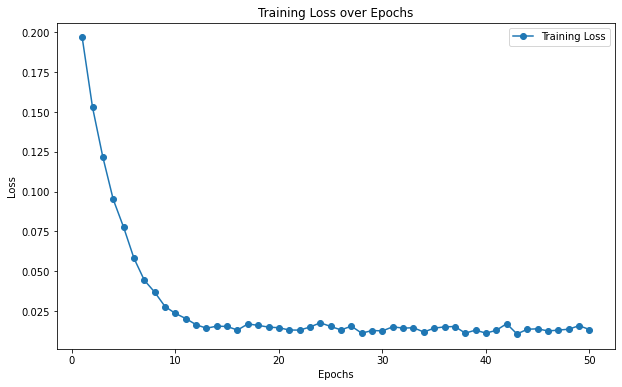

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

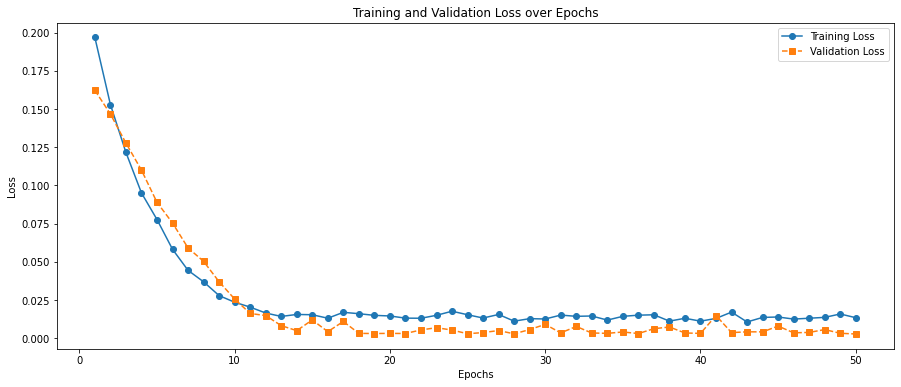

In [22]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

Test Predictions

In [23]:
from tensorflow.keras.models import load_model
model1 = load_model('Baffin_model_LT8/')

In [24]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 1s 8ms/step


In [25]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

RMSE : 0.06109869065249164


In [26]:
mae = mean_absolute_error(y_test, test_predictions)
print(mae)

0.04261001578458784


In [27]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

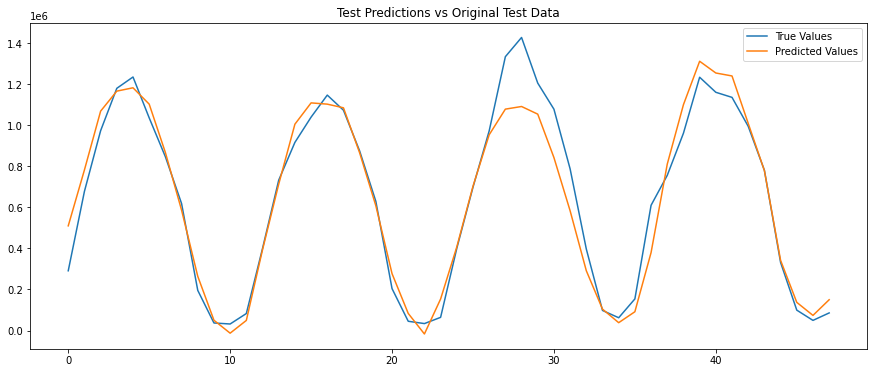

In [28]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

Prediction on whole dataset

In [29]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 3ms/step


In [30]:
mse = mean_squared_error(y, predictions)
print(mse)

0.00440310310847711


In [31]:
mae = mean_absolute_error(y, predictions)
print(mae)

0.049108383978155895


In [32]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

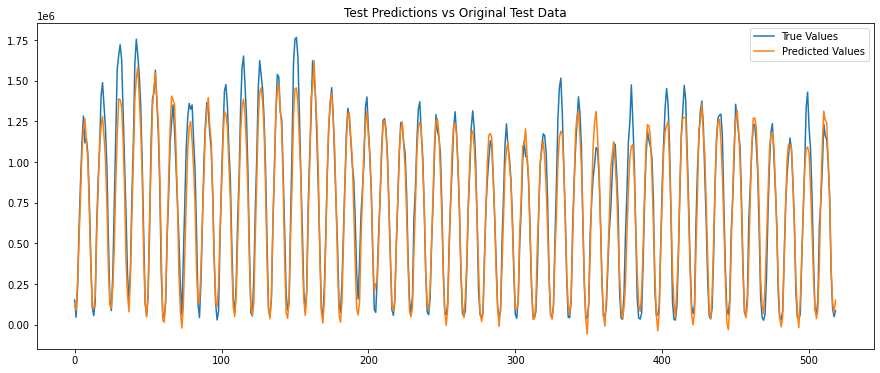

In [33]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()